In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier


In [2]:
# 1. Tải lại dữ liệu đã xử lý từ File 1
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [6]:
from sklearn.model_selection import GridSearchCV
# BEGIN: Hyperparameter tuning for Random Forest
# Define the model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
# END: Hyperparameter tuning for Random Forest

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2,

In [7]:
best_model_rf = grid_search.best_estimator_
# 3. Đánh giá mô hình trên tập kiểm tra
model_name = "Random Forest Classifier"
y_pred_rf = best_model_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf)
print(f"\nĐộ chính xác (Accuracy) của {model_name}: {acc*100:.2f}%")
print("-" * 30)
print("Báo cáo chi tiết (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_rf))
print("-" * 30)
print(f'F1_Score: {classification_report(y_test, y_pred_rf, output_dict=True)["weighted avg"]["f1-score"]:.4f}')
print(f'Accuracy: {classification_report(y_test, y_pred_rf, output_dict=True)["accuracy"]:.4f}')


Độ chính xác (Accuracy) của Random Forest Classifier: 98.21%
------------------------------
Báo cáo chi tiết (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.75      0.86         4

    accuracy                           0.98        56
   macro avg       0.99      0.88      0.92        56
weighted avg       0.98      0.98      0.98        56

------------------------------
F1_Score: 0.9810
Accuracy: 0.9821


Exception ignored in: <function ResourceTracker.__del__ at 0x107585e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10245de40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10226de40>
Traceback (most recent call last

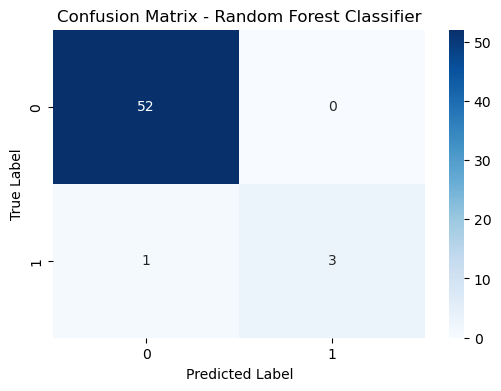

In [8]:
# 5. Vẽ Confusion Matrix (Tùy chọn để làm đẹp báo cáo)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()